In [ ]:
import numpy as np
from keras import layers
# import keras
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling
# oling2D, Dense, Flatten
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/PreProcessed_Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
processed_images="/tmp/PreProcessed_Dataset"
img_label=[]
img_path=[]
for dirname, _ ,filenames in os.walk(processed_images):
    for filename in filenames:
      if os.path.splitext(filename)[-1]=='.png':
            img_label.append(os.path.split(dirname)[-1])
            img_path.append(os.path.join(dirname,filename))   

In [ ]:
img_df=pd.DataFrame(columns=['path','label'])
img_df['path']= img_path
img_df['label']= img_label
img_df

,path,label
0,/tmp/PreProcessed_Dataset/Singhara/1394.png,Singhara
1,/tmp/PreProcessed_Dataset/Singhara/1408.png,Singhara
2,/tmp/PreProcessed_Dataset/Singhara/1411.png,Singhara
3,/tmp/PreProcessed_Dataset/Singhara/1382.png,Singhara
4,/tmp/PreProcessed_Dataset/Singhara/1397.png,Singhara
...,...,...
1684,/tmp/PreProcessed_Dataset/Prawn/1140.png,Prawn
1685,/tmp/PreProcessed_Dataset/Prawn/1197.png,Prawn
1686,/tmp/PreProcessed_Dataset/Prawn/1231.png,Prawn
1687,/tmp/PreProcessed_Dataset/Prawn/1152.png,Prawn


In [ ]:
import PIL as image_lib
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    processed_images,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1689 files belonging to 20 classes.
Using 1352 files for training.


In [ ]:
img_height,img_width=224,224
batch_size=32
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    processed_images,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1689 files belonging to 20 classes.
Using 337 files for validation.


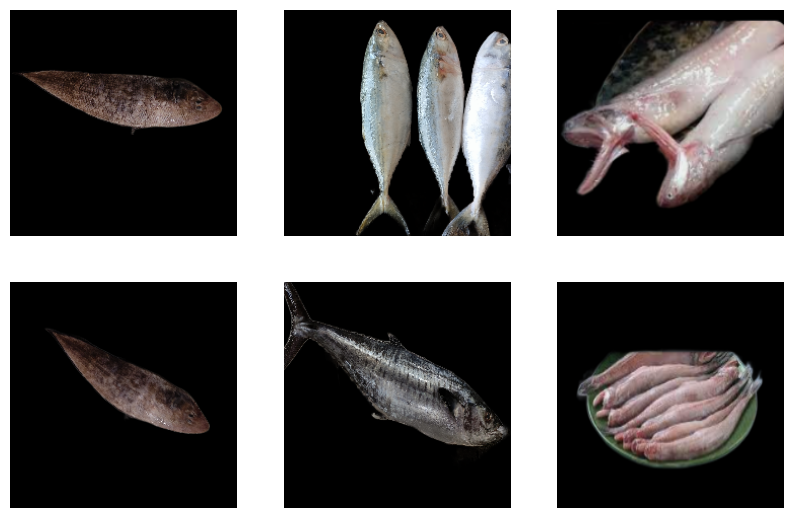

In [ ]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

In [ ]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=20,

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(Flatten())

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(20, activation='softmax'))

In [ ]:
resnet_model.summary()
resnet_model.compile(optimizer=Adam(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
Total params: 23,869,076
Trainable params: 281,364
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10
43/43 [====================